# Question/Answer

- Match
- Data ranges from?  **[2008 - 2017]**
- Total city where cricket is played? 
- Result has 3 data **['normal' 'tie' 'no result']** 
- How many matches not played? **3**
- umpire3 no data available
- Year  matches
- 2013:    76
- 2012:    74
- 2011:    73
- 2016:    60
- 2014:    60
- 2010:    60
- 2017:    59
- 2015:    59
- 2008:    58
- 2009:    57

- Total of **636** matches played
- Highest player_of_the_match?  CH Gayle  ------  **18**
- Most time the winner is? Mumbai Indians: **92**
- Maximum matches played in which city? **Mumbai **
- Maximum matches played in which seasons? **[2011,2012,2013]**
- Which team won by highest margin? **Mumbai Indians**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
matches = pd.read_csv('matches.csv')
deliveries= pd.read_csv('deliveries.csv')

In [4]:
matches.shape  #### 18 columns

(636, 18)

In [5]:
matches.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 636 entries, 0 to 635
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               636 non-null    int64  
 1   season           636 non-null    int64  
 2   city             629 non-null    object 
 3   date             636 non-null    object 
 4   team1            636 non-null    object 
 5   team2            636 non-null    object 
 6   toss_winner      636 non-null    object 
 7   toss_decision    636 non-null    object 
 8   result           636 non-null    object 
 9   dl_applied       636 non-null    int64  
 10  winner           633 non-null    object 
 11  win_by_runs      636 non-null    int64  
 12  win_by_wickets   636 non-null    int64  
 13  player_of_match  633 non-null    object 
 14  venue            636 non-null    object 
 15  umpire1          635 non-null    object 
 16  umpire2          635 non-null    object 
 17  umpire3         

In [6]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [15]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [20]:
#### unique data in some categories

for i in ["season","city","result","dl_applied","venue","umpire3"]:
    print(i,": \n",matches[i].unique(),"\n")

season : 
 [2017 2008 2009 2010 2011 2012 2013 2014 2015 2016] 

city : 
 ['Hyderabad' 'Pune' 'Rajkot' 'Indore' 'Bangalore' 'Mumbai' 'Kolkata'
 'Delhi' 'Chandigarh' 'Kanpur' 'Jaipur' 'Chennai' 'Cape Town'
 'Port Elizabeth' 'Durban' 'Centurion' 'East London' 'Johannesburg'
 'Kimberley' 'Bloemfontein' 'Ahmedabad' 'Cuttack' 'Nagpur' 'Dharamsala'
 'Kochi' 'Visakhapatnam' 'Raipur' 'Ranchi' 'Abu Dhabi' 'Sharjah' nan] 

result : 
 ['normal' 'tie' 'no result'] 

dl_applied : 
 [0 1] 

venue : 
 ['Rajiv Gandhi International Stadium, Uppal'
 'Maharashtra Cricket Association Stadium'
 'Saurashtra Cricket Association Stadium' 'Holkar Cricket Stadium'
 'M Chinnaswamy Stadium' 'Wankhede Stadium' 'Eden Gardens'
 'Feroz Shah Kotla' 'Punjab Cricket Association IS Bindra Stadium, Mohali'
 'Green Park' 'Punjab Cricket Association Stadium, Mohali'
 'Sawai Mansingh Stadium' 'MA Chidambaram Stadium, Chepauk'
 'Dr DY Patil Sports Academy' 'Newlands' "St George's Park" 'Kingsmead'
 'SuperSport Park' 'Buffalo 

In [23]:
cat_col = [cat for cat in matches.columns if matches[cat].dtypes == 'O']
print(len(cat_col))
cat_col

12


['city',
 'date',
 'team1',
 'team2',
 'toss_winner',
 'toss_decision',
 'result',
 'winner',
 'player_of_match',
 'venue',
 'umpire1',
 'umpire2']

In [24]:
num_col = [cat for cat in matches.columns if matches[cat].dtypes != 'O']
print(len(num_col))
num_col

6


['id', 'season', 'dl_applied', 'win_by_runs', 'win_by_wickets', 'umpire3']

In [25]:
matches.isnull().sum()

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [29]:
matches[matches.winner.isnull()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,2011-05-21,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,2015-04-29,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,2015-05-17,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


In [30]:
#### we can drop the Umpire3 column as its of no use
matches.drop(["umpire3"],axis=1,inplace=True) 

In [31]:
matches.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN


In [93]:
print("The total seasons:",len(matches['season'].value_counts()))
matches['season'].value_counts()

The total seasons: 10


2013    76
2012    74
2011    73
2016    60
2014    60
2010    60
2017    59
2015    59
2008    58
2009    57
Name: season, dtype: int64

<AxesSubplot:xlabel='season', ylabel='count'>

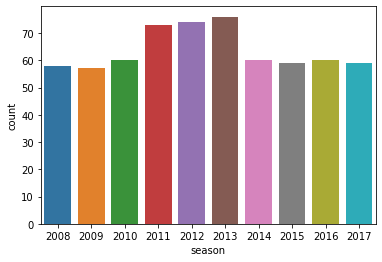

In [50]:
sns.countplot(matches['season'])

In [62]:
matches["player_of_match"].value_counts().head(20)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
DR Smith          11
V Sehwag          11
V Kohli           11
SR Watson         10
JH Kallis         10
SE Marsh           9
KA Pollard         9
A Mishra           9
SR Tendulkar       8
AT Rayudu          7
Name: player_of_match, dtype: int64

In [70]:
matches["winner"].value_counts()

Mumbai Indians                 92
Chennai Super Kings            79
Kolkata Knight Riders          77
Royal Challengers Bangalore    73
Kings XI Punjab                70
Rajasthan Royals               63
Delhi Daredevils               62
Sunrisers Hyderabad            42
Deccan Chargers                29
Gujarat Lions                  13
Pune Warriors                  12
Rising Pune Supergiant         10
Kochi Tuskers Kerala            6
Rising Pune Supergiants         5
Name: winner, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 [Text(0, 0, 'Sunrisers Hyderabad'),
  Text(1, 0, 'Rising Pune Supergiant'),
  Text(2, 0, 'Kolkata Knight Riders'),
  Text(3, 0, 'Kings XI Punjab'),
  Text(4, 0, 'Royal Challengers Bangalore'),
  Text(5, 0, 'Mumbai Indians'),
  Text(6, 0, 'Delhi Daredevils'),
  Text(7, 0, 'Gujarat Lions'),
  Text(8, 0, 'Chennai Super Kings'),
  Text(9, 0, 'Rajasthan Royals'),
  Text(10, 0, 'Deccan Chargers'),
  Text(11, 0, 'Pune Warriors'),
  Text(12, 0, 'Kochi Tuskers Kerala'),
  Text(13, 0, 'Rising Pune Supergiants')])

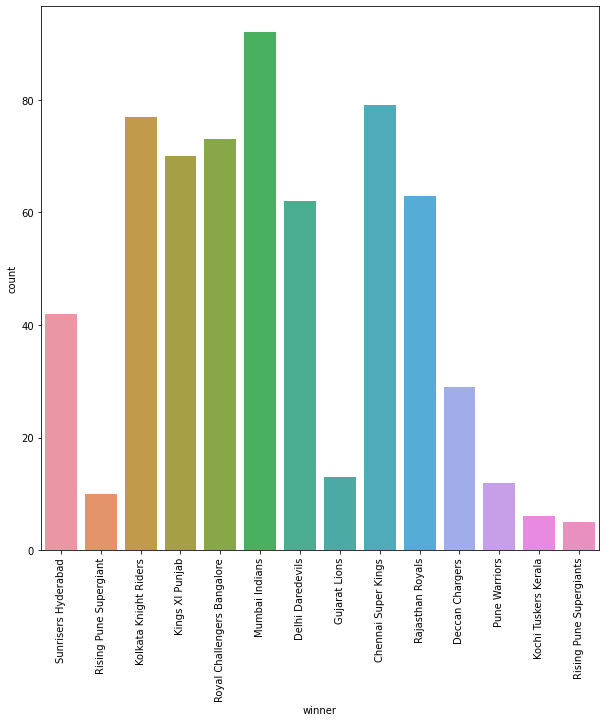

In [75]:
plt.figure(figsize=(10,10))
sns.countplot(matches['winner'])
plt.xticks(rotation=90)

In [66]:
matches["city"].value_counts()

Mumbai            85
Bangalore         66
Kolkata           61
Delhi             60
Hyderabad         49
Chennai           48
Chandigarh        46
Jaipur            33
Pune              32
Durban            15
Ahmedabad         12
Centurion         12
Visakhapatnam     11
Rajkot            10
Dharamsala         9
Johannesburg       8
Cape Town          7
Abu Dhabi          7
Port Elizabeth     7
Cuttack            7
Ranchi             7
Sharjah            6
Raipur             6
Kochi              5
Indore             5
Kanpur             4
East London        3
Nagpur             3
Kimberley          3
Bloemfontein       2
Name: city, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]),
 [Text(0, 0, 'Hyderabad'),
  Text(1, 0, 'Pune'),
  Text(2, 0, 'Rajkot'),
  Text(3, 0, 'Indore'),
  Text(4, 0, 'Bangalore'),
  Text(5, 0, 'Mumbai'),
  Text(6, 0, 'Kolkata'),
  Text(7, 0, 'Delhi'),
  Text(8, 0, 'Chandigarh'),
  Text(9, 0, 'Kanpur'),
  Text(10, 0, 'Jaipur'),
  Text(11, 0, 'Chennai'),
  Text(12, 0, 'Cape Town'),
  Text(13, 0, 'Port Elizabeth'),
  Text(14, 0, 'Durban'),
  Text(15, 0, 'Centurion'),
  Text(16, 0, 'East London'),
  Text(17, 0, 'Johannesburg'),
  Text(18, 0, 'Kimberley'),
  Text(19, 0, 'Bloemfontein'),
  Text(20, 0, 'Ahmedabad'),
  Text(21, 0, 'Cuttack'),
  Text(22, 0, 'Nagpur'),
  Text(23, 0, 'Dharamsala'),
  Text(24, 0, 'Kochi'),
  Text(25, 0, 'Visakhapatnam'),
  Text(26, 0, 'Raipur'),
  Text(27, 0, 'Ranchi'),
  Text(28, 0, 'Abu Dhabi'),
  Text(29, 0, 'Sharjah')])

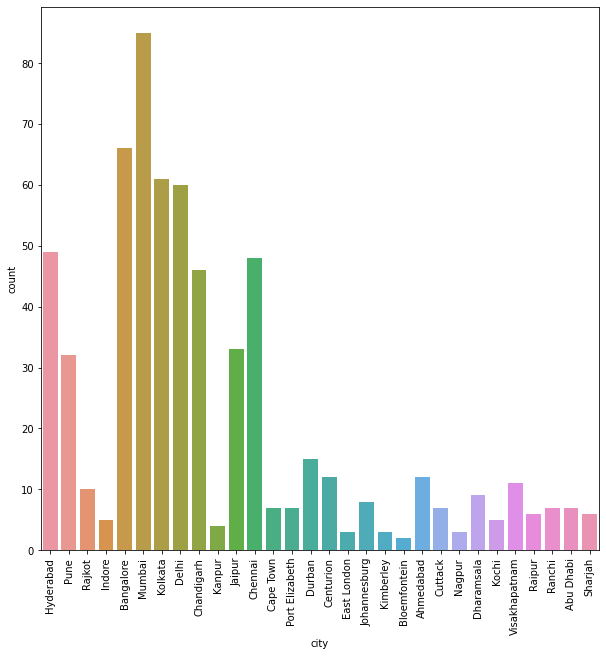

In [76]:
plt.figure(figsize=(10,10))
sns.countplot(matches['city'])
plt.xticks(rotation=90)

<AxesSubplot:xlabel='result', ylabel='count'>

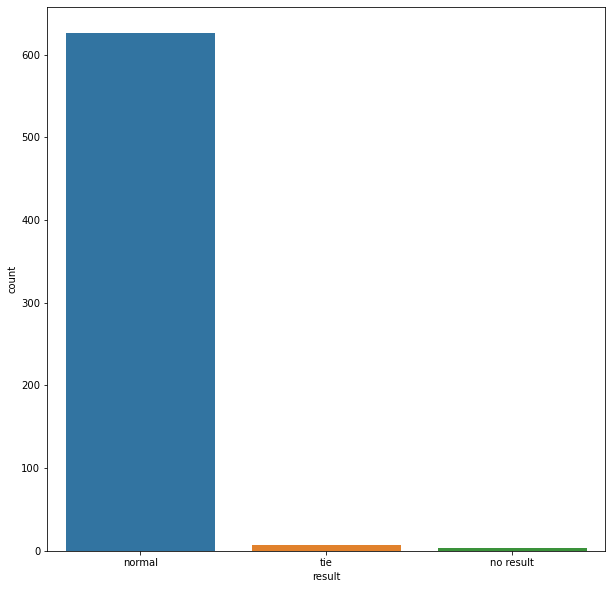

In [78]:
plt.figure(figsize=(10,10))
sns.countplot(matches['result'])
# plt.xticks(rotation=90)

In [83]:
matches[matches.win_by_runs == matches['win_by_runs'].unique().max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
43,44,2017,Delhi,2017-05-06,Mumbai Indians,Delhi Daredevils,Delhi Daredevils,field,normal,0,Mumbai Indians,146,0,LMP Simmons,Feroz Shah Kotla,Nitin Menon,CK Nandan


In [84]:
matches[matches.win_by_runs == matches['win_by_wickets'].unique().max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
54,55,2017,Delhi,2017-05-14,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,10,0,HV Patel,Feroz Shah Kotla,CK Nandan,C Shamshuddin
75,76,2008,Delhi,2008-04-30,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Delhi Daredevils,10,0,GD McGrath,Feroz Shah Kotla,Aleem Dar,I Shivram
109,110,2008,Chennai,2008-05-24,Rajasthan Royals,Chennai Super Kings,Rajasthan Royals,bat,normal,0,Rajasthan Royals,10,0,JA Morkel,"MA Chidambaram Stadium, Chepauk",DJ Harper,SL Shastri
188,189,2010,Cuttack,2010-03-21,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,normal,0,Deccan Chargers,10,0,A Symonds,Barabati Stadium,BF Bowden,M Erasmus
280,281,2011,Kolkata,2011-05-07,Chennai Super Kings,Kolkata Knight Riders,Chennai Super Kings,bat,normal,1,Kolkata Knight Riders,10,0,Iqbal Abdulla,Eden Gardens,Asad Rauf,PR Reiffel
291,292,2011,Mumbai,2011-05-14,Deccan Chargers,Mumbai Indians,Deccan Chargers,bat,normal,0,Deccan Chargers,10,0,A Mishra,Wankhede Stadium,S Ravi,SK Tarapore
351,352,2012,Chennai,2012-05-04,Chennai Super Kings,Deccan Chargers,Chennai Super Kings,bat,normal,0,Chennai Super Kings,10,0,SK Raina,"MA Chidambaram Stadium, Chepauk",HDPK Dharmasena,BNJ Oxenford
481,482,2014,Ahmedabad,2014-05-05,Rajasthan Royals,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Rajasthan Royals,10,0,PV Tambe,"Sardar Patel Stadium, Motera",NJ Llong,CK Nandan
592,593,2016,Delhi,2016-04-23,Delhi Daredevils,Mumbai Indians,Mumbai Indians,field,normal,0,Delhi Daredevils,10,0,SV Samson,Feroz Shah Kotla,S Ravi,C Shamshuddin


In [90]:
matches.groupby('winner')['win_by_wickets'].max()

winner
Chennai Super Kings            10
Deccan Chargers                10
Delhi Daredevils               10
Gujarat Lions                   7
Kings XI Punjab                10
Kochi Tuskers Kerala            8
Kolkata Knight Riders          10
Mumbai Indians                 10
Pune Warriors                   7
Rajasthan Royals               10
Rising Pune Supergiant          9
Rising Pune Supergiants         9
Royal Challengers Bangalore    10
Sunrisers Hyderabad            10
Name: win_by_wickets, dtype: int64

In [94]:
matches.groupby('city')['win_by_wickets'].max()

city
Abu Dhabi          6
Ahmedabad          9
Bangalore         10
Bloemfontein       6
Cape Town         10
Centurion          8
Chandigarh        10
Chennai            9
Cuttack            9
Delhi             10
Dharamsala         6
Durban             9
East London        7
Hyderabad          9
Indore             8
Jaipur            10
Johannesburg       9
Kanpur             8
Kimberley          7
Kochi              7
Kolkata            9
Mumbai            10
Nagpur             6
Port Elizabeth     7
Pune               9
Raipur             7
Rajkot            10
Ranchi             6
Sharjah            8
Visakhapatnam      7
Name: win_by_wickets, dtype: int64

In [95]:
matches.groupby('city')['win_by_wickets'].min()

city
Abu Dhabi         0
Ahmedabad         0
Bangalore         0
Bloemfontein      0
Cape Town         0
Centurion         0
Chandigarh        0
Chennai           0
Cuttack           0
Delhi             0
Dharamsala        0
Durban            0
East London       0
Hyderabad         0
Indore            6
Jaipur            0
Johannesburg      0
Kanpur            2
Kimberley         0
Kochi             0
Kolkata           0
Mumbai            0
Nagpur            0
Port Elizabeth    0
Pune              0
Raipur            0
Rajkot            0
Ranchi            0
Sharjah           0
Visakhapatnam     0
Name: win_by_wickets, dtype: int64

In [101]:
matches[matches.win_by_wickets == matches['win_by_wickets'].unique().max()]

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan
34,35,2017,Chandigarh,2017-04-30,Delhi Daredevils,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,10,Sandeep Sharma,"Punjab Cricket Association IS Bindra Stadium, ...",YC Barde,CK Nandan
71,72,2008,Mumbai,2008-04-27,Mumbai Indians,Deccan Chargers,Deccan Chargers,field,normal,0,Deccan Chargers,0,10,AC Gilchrist,Dr DY Patil Sports Academy,Asad Rauf,SL Shastri
119,120,2009,Cape Town,2009-04-19,Kings XI Punjab,Delhi Daredevils,Delhi Daredevils,field,normal,1,Delhi Daredevils,0,10,DL Vettori,Newlands,MR Benson,SD Ranade
183,184,2010,Bangalore,2010-03-18,Rajasthan Royals,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,JH Kallis,M Chinnaswamy Stadium,K Hariharan,DJ Harper
298,299,2011,Mumbai,2011-05-20,Mumbai Indians,Rajasthan Royals,Mumbai Indians,bat,normal,0,Rajasthan Royals,0,10,SR Watson,Wankhede Stadium,RE Koertzen,PR Reiffel
376,377,2012,Jaipur,2012-05-20,Rajasthan Royals,Mumbai Indians,Rajasthan Royals,bat,normal,0,Mumbai Indians,0,10,DR Smith,Sawai Mansingh Stadium,HDPK Dharmasena,C Shamshuddin
390,391,2013,Chandigarh,2013-04-10,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,10,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",Aleem Dar,C Shamshuddin
542,543,2015,Delhi,2015-04-26,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,10,VR Aaron,Feroz Shah Kotla,M Erasmus,S Ravi
590,591,2016,Rajkot,2016-04-21,Gujarat Lions,Sunrisers Hyderabad,Sunrisers Hyderabad,field,normal,0,Sunrisers Hyderabad,0,10,B Kumar,Saurashtra Cricket Association Stadium,K Bharatan,HDPK Dharmasena


In [102]:
matches.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2'],
      dtype='object')

In [118]:
### Is bowling or batting first the best opinion at the given venue?

pd.set_option('display.max_rows',None)
matches.groupby(['venue',"toss_decision"])['toss_decision'].count()

venue                                                 toss_decision
Barabati Stadium                                      bat               2
                                                      field             5
Brabourne Stadium                                     bat               6
                                                      field             5
Buffalo Park                                          bat               3
De Beers Diamond Oval                                 bat               2
                                                      field             1
Dr DY Patil Sports Academy                            bat               7
                                                      field            10
Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium   bat               5
                                                      field             6
Dubai International Cricket Stadium                   bat               3
                                            

In [130]:
matches.player_of_match.value_counts().head(20)

CH Gayle          18
YK Pathan         16
DA Warner         15
AB de Villiers    15
RG Sharma         14
SK Raina          14
MS Dhoni          13
G Gambhir         13
MEK Hussey        12
AM Rahane         12
DR Smith          11
V Sehwag          11
V Kohli           11
SR Watson         10
JH Kallis         10
SE Marsh           9
KA Pollard         9
A Mishra           9
SR Tendulkar       8
AT Rayudu          7
Name: player_of_match, dtype: int64

In [131]:
### CH gale is choosen as the Player of the match the most of the times 

matches[matches.player_of_match == 'CH Gayle']   

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2
19,20,2017,Rajkot,2017-04-18,Royal Challengers Bangalore,Gujarat Lions,Gujarat Lions,field,normal,0,Royal Challengers Bangalore,21,0,CH Gayle,Saurashtra Cricket Association Stadium,S Ravi,VK Sharma
122,123,2009,Durban,2009-04-21,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,1,Kolkata Knight Riders,11,0,CH Gayle,Kingsmead,DJ Harper,SD Ranade
257,258,2011,Kolkata,2011-04-22,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,Eden Gardens,SS Hazare,RB Tiffin
279,280,2011,Bangalore,2011-05-06,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Royal Challengers Bangalore,85,0,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,RB Tiffin
282,283,2011,Bangalore,2011-05-08,Kochi Tuskers Kerala,Royal Challengers Bangalore,Kochi Tuskers Kerala,bat,normal,0,Royal Challengers Bangalore,0,9,CH Gayle,M Chinnaswamy Stadium,Aleem Dar,SS Hazare
290,291,2011,Bangalore,2011-05-14,Kolkata Knight Riders,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,1,Royal Challengers Bangalore,0,4,CH Gayle,M Chinnaswamy Stadium,RE Koertzen,RB Tiffin
301,302,2011,Bangalore,2011-05-22,Chennai Super Kings,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,8,CH Gayle,M Chinnaswamy Stadium,K Hariharan,RE Koertzen
305,306,2011,Chennai,2011-05-27,Royal Challengers Bangalore,Mumbai Indians,Mumbai Indians,field,normal,0,Royal Challengers Bangalore,43,0,CH Gayle,"MA Chidambaram Stadium, Chepauk",Asad Rauf,SJA Taufel
328,329,2012,Bangalore,2012-04-17,Pune Warriors,Royal Challengers Bangalore,Pune Warriors,bat,normal,0,Royal Challengers Bangalore,0,6,CH Gayle,M Chinnaswamy Stadium,S Asnani,S Das
332,333,2012,Chandigarh,2012-04-20,Kings XI Punjab,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,5,CH Gayle,"Punjab Cricket Association Stadium, Mohali",S Ravi,RJ Tucker
